In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcParams['figure.dpi'] = 150

In [2]:
dataset = '/mnt/data/ml/ShowJetsData_addmoretaus.npz'
data = np.load(dataset)
print(data.files)

['jetImages', 'jetPt', 'jetEta', 'jetPhi', 'jetMass', 'jetMassSD', 'tau1_b05', 'tau2_b05', 'tau3_b05', 'tau1_sd_b05', 'tau2_sd_b05', 'tau3_sd_b05', 'tau1_b10', 'tau2_b10', 'tau3_b10', 'tau1_sd_b10', 'tau2_sd_b10', 'tau3_sd_b10', 'tau1_b15', 'tau2_b15', 'tau3_b15', 'tau1_sd_b15', 'tau2_sd_b15', 'tau3_sd_b15', 'tau1_b20', 'tau2_b20', 'tau3_b20', 'tau1_sd_b20', 'tau2_sd_b20', 'tau3_sd_b20', 'chMult', 'neutMult', 'phoMult', 'eleMult', 'muMult', 'jetpull', 'labels']


In [3]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white'}
# plt.rc('font', family='default')
# plt.rcParams['figure.dpi'] = 115
plt.rcParams.update(params)
plt.style.context('default')

### RAW DATASET

In [4]:
# s=time.time()
# data_dic={key : data[key]  for key in data.files}
# data_dic['jetImages'] = data_dic['jetImages'].reshape(len(data_dic['jetImages']),16,16,1)
# data_dic['jetpull'] = np.abs(data_dic['jetpull']/np.pi)
# data_dic['chMult'] = data_dic['chMult'].astype(int)
# data_dic['neutMult'] = data_dic['neutMult'].astype(int)
# data_dic['phoMult'] = data_dic['phoMult'].astype(int)
# data_dic['eleMult'] = data_dic['eleMult'].astype(int)
# data_dic['muMult'] = data_dic['muMult'].astype(int)
# data_dic['labels'] = data_dic['labels'].astype(int)
# print(time.time() -s )

### NORMALISED DATASET

In [5]:
s=time.time()
data_dic={}
data_dic['jetImages'] = data['jetImages'].reshape(len(data['jetImages']),16,16,1)
for key in data.files[1:]:
    minn = np.min(data[key])
    maxx = np.max(data[key])
    data_dic[key] = (data[key]-minn)/(maxx-minn)
    if (key=='jetpull'):
        data_dic['abs_jetpull'] = (np.abs(data['jetpull']) - np.min(np.abs(data['jetpull'])))/(np.max(np.abs(data['jetpull'])) - np.min(np.abs(data['jetpull'])))
data_dic['labels'] = data_dic['labels'].astype(int)
print(time.time() -s )

21.134186267852783


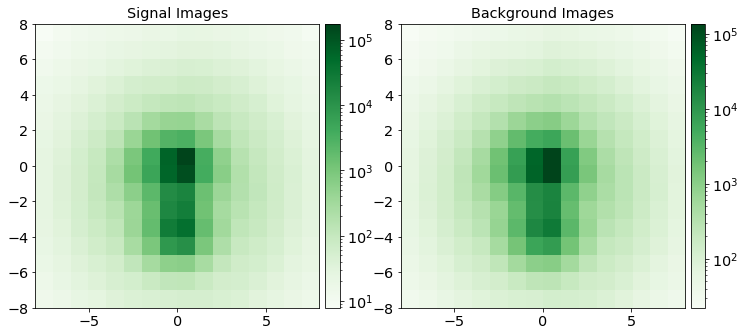

In [6]:
fig = plt.figure(figsize = (12,8))
im_sig = np.sum(data_dic['jetImages'][data_dic['labels'][:,1]==1], axis=(0,3))
im_bkg = np.sum(data_dic['jetImages'][data_dic['labels'][:,0]==1], axis=(0,3))
extent_sig = [-im_sig.shape[1]/2., im_sig.shape[1]/2., -im_sig.shape[0]/2., im_sig.shape[0]/2. ]
extent_bkg = [-im_bkg.shape[1]/2., im_bkg.shape[1]/2., -im_bkg.shape[0]/2., im_bkg.shape[0]/2. ]

ax1 = fig.add_subplot(121)
im = plt.imshow(im_sig,
                cmap='Greens', interpolation='nearest', norm=LogNorm(), extent=extent_sig)
plt.colorbar(im,fraction=0.0467, pad=0.02)
plt.title('Signal Images')

ax2 = fig.add_subplot(122)
im = plt.imshow(im_bkg,
                cmap='Greens', interpolation='nearest', norm=LogNorm(), extent=extent_bkg)
plt.colorbar(im,fraction=0.0467, pad=0.02)
plt.title('Background Images')

plt.show()
fig.savefig("plot_CNN2D-images.png", bbox_inches='tight')

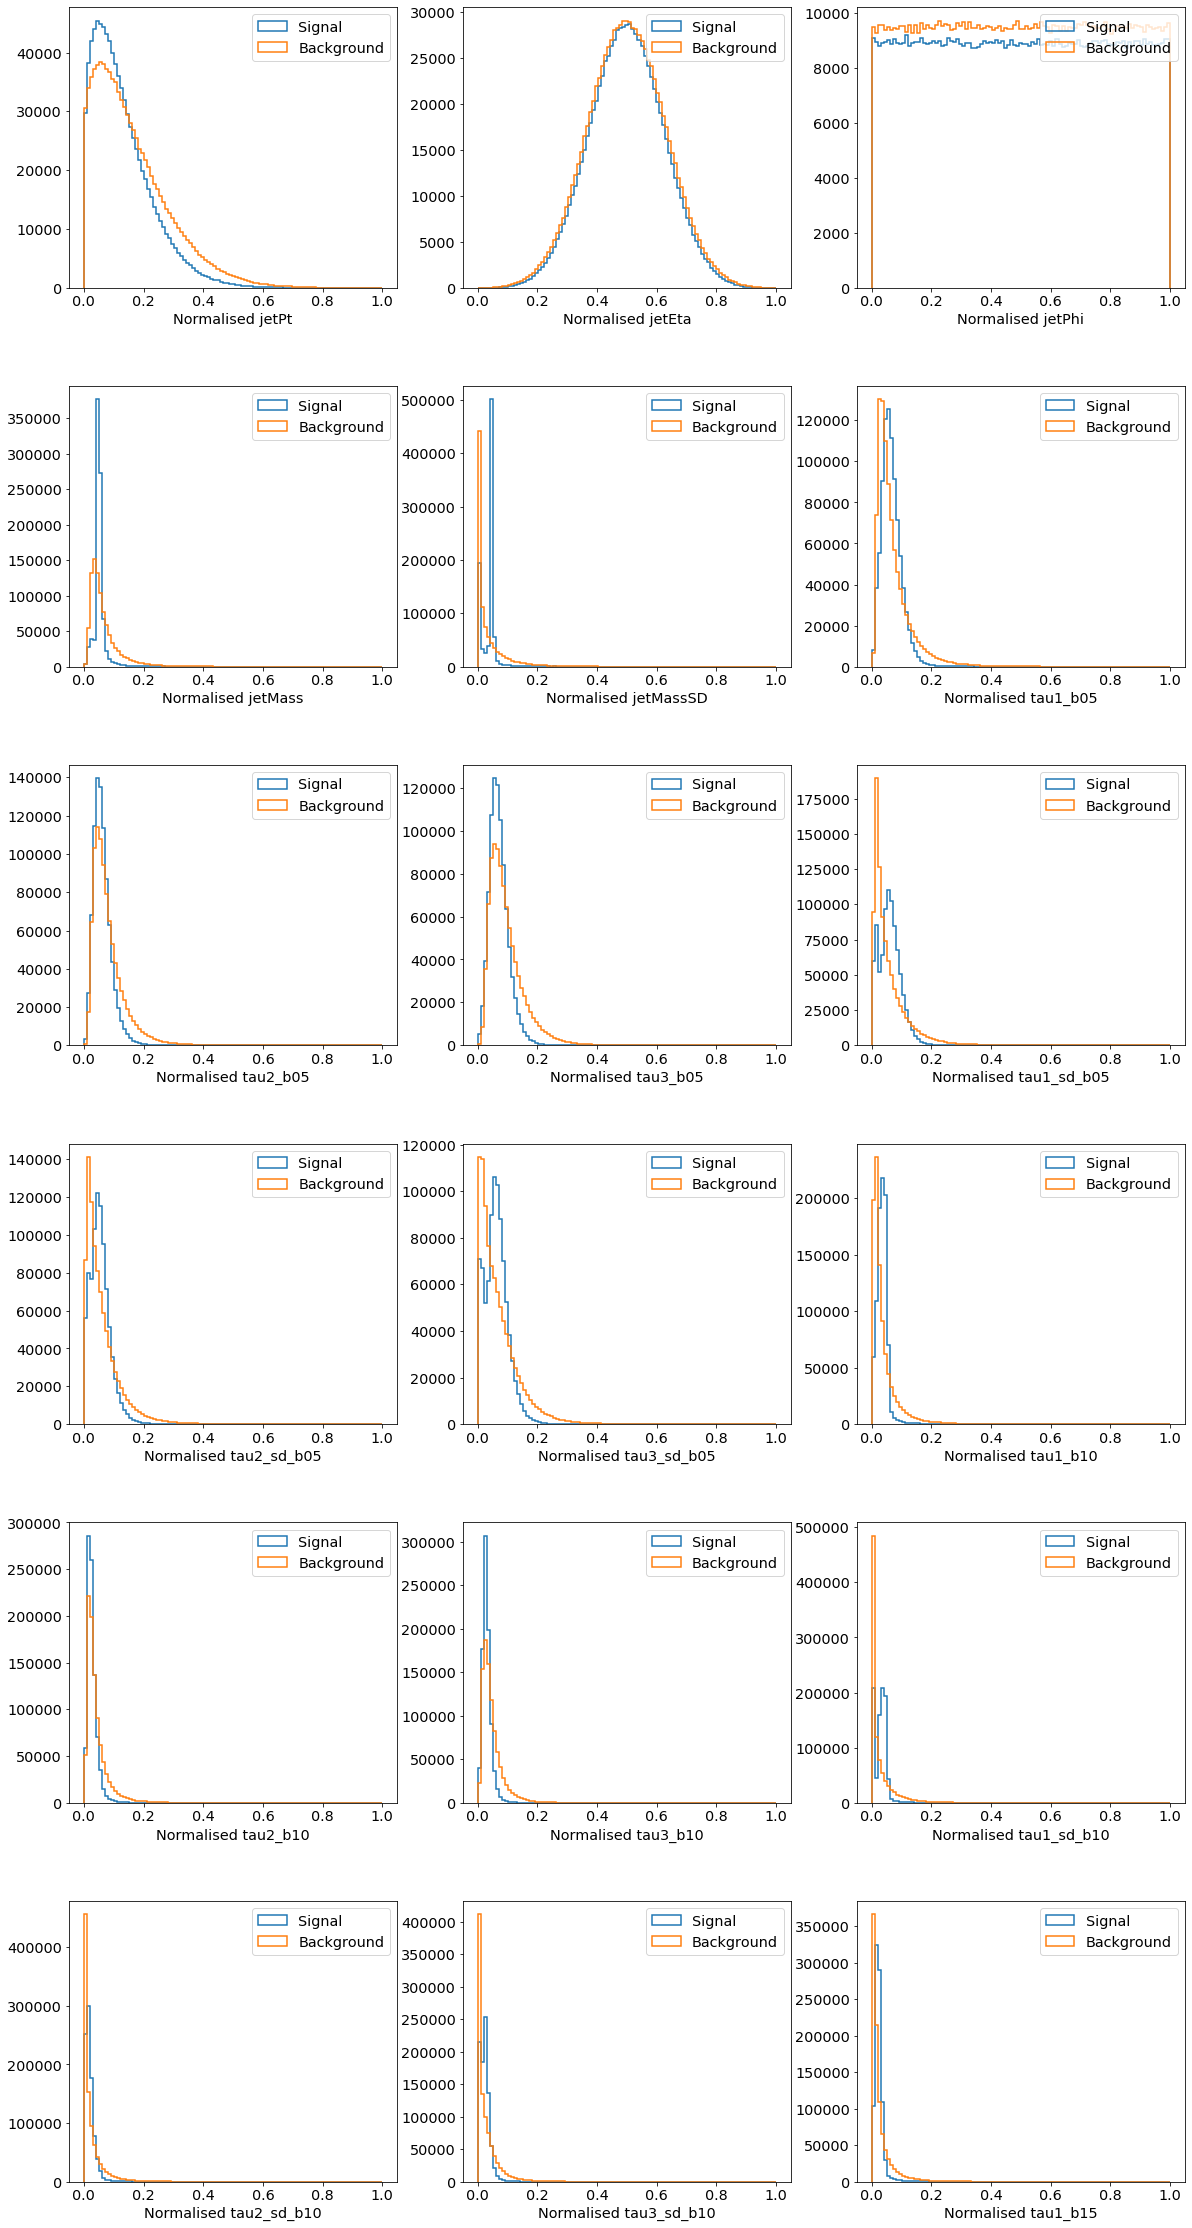

In [7]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
fig.subplots_adjust(hspace=0.35, wspace =0.2)
axs=axs.flatten()

for i in range(len(list(data_dic.keys())[1:-1])):
    bins = np.linspace(0, 1, 100)
    '''Change the bin width for particle multiplicities'''
    if (i>=29 and i<=33):
        bins = np.linspace(0, 1, 10)
    if i < 18:
        axs[i].hist(data_dic[list(data_dic.keys())[1:-1][i]][data_dic['labels'][:,1]==1], bins, label='Signal', fill=False, histtype='step', linewidth=1.5)
        axs[i].hist(data_dic[list(data_dic.keys())[1:-1][i]][data_dic['labels'][:,0]==1], bins, label='Background', fill=False, histtype='step', linewidth=1.5)
        axs[i].legend(loc='best')
        axs[i].set_xlabel('Normalised {}'.format(list(data_dic.keys())[1:-1][i]))
    
plt.show()
fig.savefig("plot_CNN2D-variables_1.png", bbox_inches='tight')

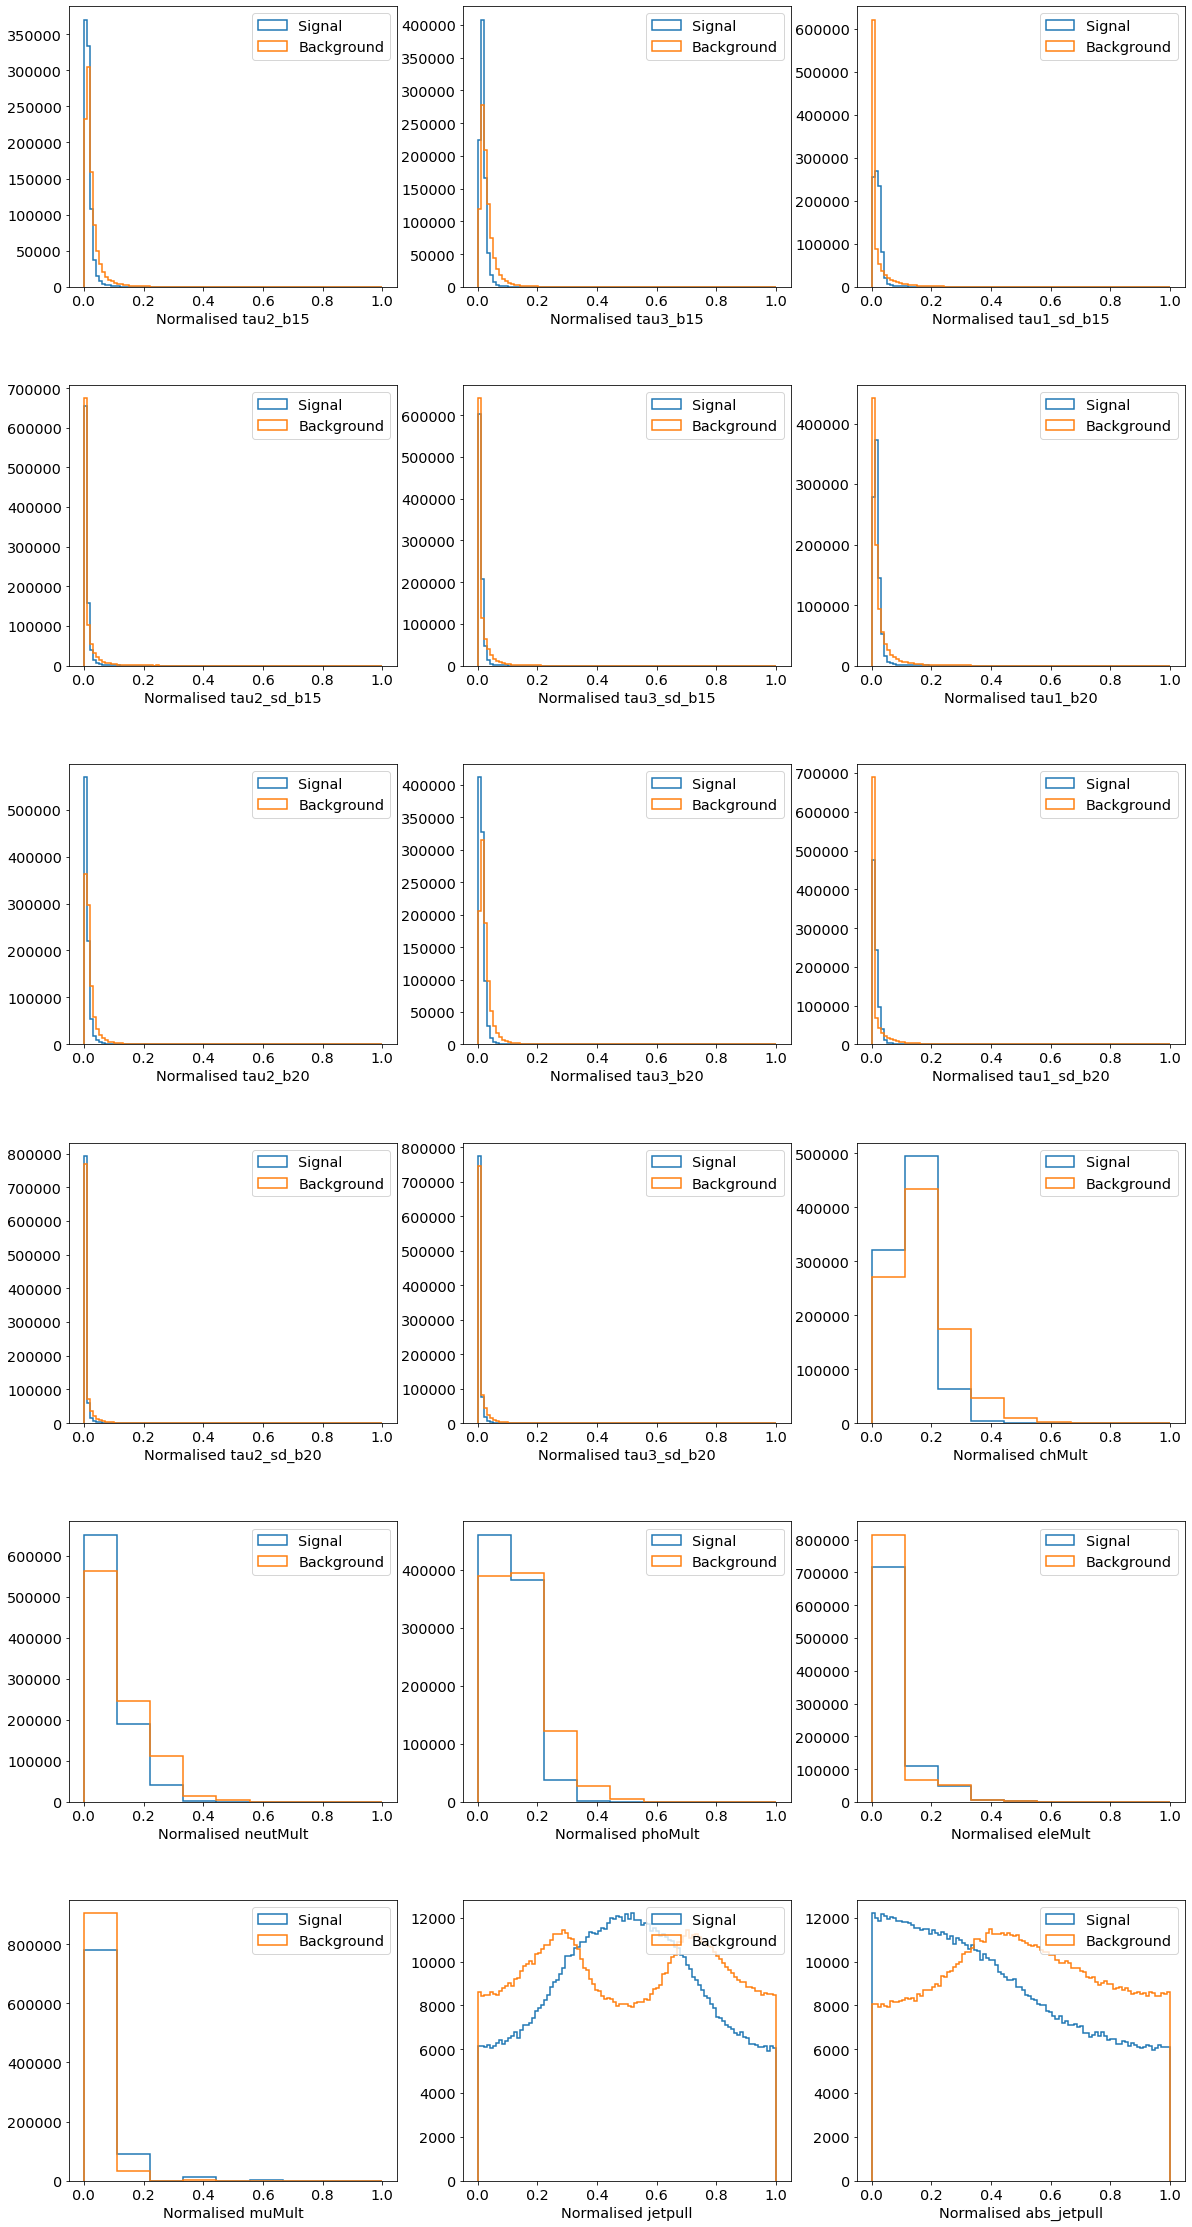

In [8]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
fig.subplots_adjust(hspace=0.35, wspace =0.2)
axs=axs.flatten()

for i in range(len(list(data_dic.keys())[1:-1])):
    bins = np.linspace(0, 1, 100)
    '''Change the bin width for particle multiplicities'''
    if (i>=29 and i<=33):
        bins = np.linspace(0, 1, 10)
    if i >= 18:
        _i = int(i-18)
        axs[_i].hist(data_dic[list(data_dic.keys())[1:-1][i]][data_dic['labels'][:,1]==1], bins, label='Signal', fill=False, histtype='step', linewidth=1.5)
        axs[_i].hist(data_dic[list(data_dic.keys())[1:-1][i]][data_dic['labels'][:,0]==1], bins, label='Background', fill=False, histtype='step', linewidth=1.5)
        axs[_i].legend(loc='best')
        axs[_i].set_xlabel('Normalised {}'.format(list(data_dic.keys())[1:-1][i]))
    
plt.show()
fig.savefig("plot_CNN2D-variables_2.png", bbox_inches='tight')

In [9]:
numData = np.min([np.sum(data_dic['labels'][:,1]==1), np.sum(data_dic['labels'][:,0]==1)])

In [10]:
z = np.argwhere(data_dic['labels'][:,1]==1)[:numData].flatten()
qcd = np.argwhere(data_dic['labels'][:,0]==1)[:numData].flatten()

In [11]:
split = int(0.8*numData)
train_id = np.concatenate((z[:split],qcd[:split]),axis=0)
np.random.shuffle(train_id)
test_id = np.concatenate((z[split:],qcd[split:]),axis=0)
np.random.shuffle(test_id)

In [12]:
train_data={}
test_data={}
for key in data_dic.keys():
    train_data[key] = data_dic[key][train_id]
    test_data[key] = data_dic[key][test_id]

In [13]:
feat = list(data_dic.keys())
feat.remove('jetImages')
feat.remove('labels')

In [14]:
train=pd.DataFrame(train_data,columns=feat)
test=pd.DataFrame(test_data,columns=feat)

In [15]:
train.corr()

,jetPt,jetEta,jetPhi,jetMass,jetMassSD,tau1_b05,tau2_b05,tau3_b05,tau1_sd_b05,tau2_sd_b05,...,tau1_sd_b20,tau2_sd_b20,tau3_sd_b20,chMult,neutMult,phoMult,eleMult,muMult,jetpull,abs_jetpull
jetPt,1.000000,0.000441,0.001087,0.476689,0.190792,0.536432,0.580700,0.612450,0.415639,0.413998,...,0.048273,0.014960,-0.018320,0.274832,0.140534,0.354888,0.062869,-0.001045,-0.000549,-0.003705
jetEta,0.000441,1.000000,0.000246,0.000703,0.000944,0.001062,0.000388,0.000427,0.001167,0.000626,...,0.000527,-0.000418,-0.000415,0.000317,0.000864,0.001304,-0.000816,-0.000346,0.000117,0.000345
jetPhi,0.001087,0.000246,1.000000,0.001735,0.001249,0.001314,0.001081,0.001262,0.001087,0.000938,...,0.001228,0.000410,0.000460,0.001233,0.001076,0.001093,-0.000559,0.000877,0.001097,-0.000668
jetMass,0.476689,0.000703,0.001735,1.000000,0.815834,0.829007,0.766703,0.750677,0.746744,0.702198,...,0.771041,0.585129,0.583191,0.610184,0.388824,0.582520,0.089378,0.022313,0.000110,-0.015445
jetMassSD,0.190792,0.000944,0.001249,0.815834,1.000000,0.793297,0.597011,0.554919,0.863880,0.779521,...,0.915326,0.687903,0.708240,0.505950,0.308806,0.482481,0.088697,0.050726,0.000674,-0.088458
tau1_b05,0.536432,0.001062,0.001314,0.829007,0.793297,1.000000,0.873280,0.847051,0.961520,0.889936,...,0.641385,0.524863,0.514659,0.662440,0.385079,0.680381,0.123043,0.050572,-0.000131,-0.066115
tau2_b05,0.580700,0.000388,0.001081,0.766703,0.597011,0.873280,1.000000,0.974515,0.774170,0.895454,...,0.468776,0.522402,0.505028,0.777038,0.461375,0.782252,0.124996,0.029456,-0.001416,0.001496
tau3_b05,0.612450,0.000427,0.001262,0.750677,0.554919,0.847051,0.974515,1.000000,0.736458,0.852874,...,0.420702,0.454288,0.469923,0.793483,0.469638,0.799308,0.125058,0.024237,-0.001327,0.004324
tau1_sd_b05,0.415639,0.001167,0.001087,0.746744,0.863880,0.961520,0.774170,0.736458,1.000000,0.911044,...,0.696186,0.560590,0.559492,0.586719,0.334951,0.606981,0.117510,0.060647,0.000141,-0.099763
tau2_sd_b05,0.413998,0.000626,0.000938,0.702198,0.779521,0.889936,0.895454,0.852874,0.911044,1.000000,...,0.611943,0.624953,0.622961,0.705402,0.408788,0.715465,0.126811,0.052597,-0.000777,-0.060738


In [16]:
test.corr()

,jetPt,jetEta,jetPhi,jetMass,jetMassSD,tau1_b05,tau2_b05,tau3_b05,tau1_sd_b05,tau2_sd_b05,...,tau1_sd_b20,tau2_sd_b20,tau3_sd_b20,chMult,neutMult,phoMult,eleMult,muMult,jetpull,abs_jetpull
jetPt,1.000000,0.000530,-0.001052,0.476676,0.191589,0.536046,0.581305,0.612498,0.415510,0.414600,...,0.049835,0.013304,-0.018455,0.274998,0.138667,0.355583,0.062944,-0.002819,0.001617,-0.004750
jetEta,0.000530,1.000000,0.005778,0.000274,0.000293,-0.000187,0.000613,0.000971,-0.000067,0.000854,...,-0.000062,-0.000231,0.001240,0.000947,-0.002113,0.000999,0.001163,-0.000246,-0.000087,-0.000709
jetPhi,-0.001052,0.005778,1.000000,0.002094,0.002820,0.001100,0.001252,0.000732,0.001557,0.001945,...,0.003175,0.003037,0.003470,0.002050,-0.000265,0.000567,0.000192,0.001539,-0.003051,0.002526
jetMass,0.476676,0.000274,0.002094,1.000000,0.818322,0.829048,0.765013,0.749824,0.747859,0.701677,...,0.772920,0.585189,0.582267,0.609639,0.387465,0.584007,0.091092,0.021114,0.001359,-0.016579
jetMassSD,0.191589,0.000293,0.002820,0.818322,1.000000,0.793278,0.596708,0.555692,0.863451,0.777517,...,0.915489,0.688616,0.706436,0.505891,0.309006,0.484555,0.088973,0.048592,0.001090,-0.090002
tau1_b05,0.536046,-0.000187,0.001100,0.829048,0.793278,1.000000,0.873363,0.847686,0.961608,0.889798,...,0.640821,0.524154,0.512847,0.662381,0.385789,0.682333,0.124779,0.047957,0.001162,-0.068281
tau2_b05,0.581305,0.000613,0.001252,0.765013,0.596708,0.873363,1.000000,0.974794,0.774988,0.896598,...,0.466116,0.522124,0.504217,0.777498,0.461610,0.783774,0.126318,0.024977,0.001458,0.000018
tau3_b05,0.612498,0.000971,0.000732,0.749824,0.555692,0.847686,0.974794,1.000000,0.737942,0.854350,...,0.420088,0.457066,0.470156,0.793483,0.469554,0.800398,0.125140,0.020140,0.001746,0.003574
tau1_sd_b05,0.415510,-0.000067,0.001557,0.747859,0.863451,0.961608,0.774988,0.737942,1.000000,0.910783,...,0.695523,0.560652,0.557865,0.587192,0.336349,0.609324,0.118995,0.057794,0.000717,-0.102235
tau2_sd_b05,0.414600,0.000854,0.001945,0.701677,0.777517,0.889798,0.896598,0.854350,0.910783,1.000000,...,0.608159,0.625194,0.621536,0.706498,0.410034,0.717691,0.127911,0.047397,0.001013,-0.062670


In [17]:
# np.savez('./NormedShowJet_addmoretaus_train.npz',**train_data)
# np.savez('./NormedShowJet_addmoretaus_test.npz',**test_data)

# Plotting scrpits for individual variables

## Plot input variables

In [18]:
# fig = plt.figure(figsize = (10,10))

# ax1 = fig.add_subplot(221)
# im = plt.imshow(np.sum(train_data['jetImages'][train_data['labels'][:,1]==1], axis=(0,3)),
#                 cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
# plt.colorbar(im,fraction=0.0467, pad=0.02)
# plt.title('Train Signal Images')

# ax2 = fig.add_subplot(222)
# im = plt.imshow(np.sum(test_data['jetImages'][test_data['labels'][:,1]==1], axis=(0,3)),
#                 cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
# plt.colorbar(im,fraction=0.0467, pad=0.02)
# plt.title('Test Signal Images')

# ax3 = fig.add_subplot(223)
# im = plt.imshow(np.sum(train_data['jetImages'][train_data['labels'][:,0]==1], axis=(0,3)),
#                 cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
# plt.colorbar(im,fraction=0.0467, pad=0.02)
# plt.title('Train Background Images')

# ax4 = fig.add_subplot(224)
# im = plt.imshow(np.sum(test_data['jetImages'][test_data['labels'][:,0]==1], axis=(0,3)),
#                 cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
# plt.colorbar(im,fraction=0.0467, pad=0.02)
# plt.title('Test Background Images')
# plt.show()

## Jet pT plot

In [19]:
# plt.rcParams['figure.dpi'] = 70

In [20]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['jetPt'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['jetPt'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('pT')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['jetPt'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['jetPt'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('pT')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

## Jet eta plot

In [21]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['jetEta'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['jetEta'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('eta')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['jetEta'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['jetEta'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('eta')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

## Jet phi plot

In [22]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['jetPhi'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['jetPhi'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('phi')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['jetPhi'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['jetPhi'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('phi')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

## tau21 plot

In [23]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['tau21'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['tau21'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau21')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['tau21'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['tau21'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau21')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [24]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['tau31'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['tau31'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau31')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['tau31'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['tau31'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau31')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [25]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['tau32'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['tau32'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau32')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['tau32'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['tau32'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau32')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [26]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['tau21_sd'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['tau21_sd'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau21')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['tau21_sd'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['tau21_sd'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau21')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [27]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['tau31_sd'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['tau31_sd'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau31')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['tau31_sd'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['tau31_sd'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau31')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [28]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['tau32_sd'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['tau32_sd'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau32')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['tau32_sd'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['tau32_sd'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('tau32')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

## Plot jetpull

In [29]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['jetpull'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# train['jetpull'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('pull angle')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['jetpull'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
# test['jetpull'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
# plt.xlabel('pull angle')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

## Plot Multiplicities

In [30]:
# fig = plt.figure(figsize = (20,6))
# ax1 = fig.add_subplot(121)
# train['chMult'][train_data['labels'][:,1]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Signal')
# train['chMult'][train_data['labels'][:,0]==1].hist(bins=20, alpha=0.5, range=[0,1],label ='Bkg')
# plt.xlabel('Multiplicity')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['chMult'][test_data['labels'][:,1]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Signal')
# test['chMult'][test_data['labels'][:,0]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('pull Multiplicity')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [31]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['neutMult'][train_data['labels'][:,1]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Signal')
# train['neutMult'][train_data['labels'][:,0]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('Multiplicity')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['neutMult'][test_data['labels'][:,1]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Signal')
# test['neutMult'][test_data['labels'][:,0]==1].hist(bins=20, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('pull Multiplicity')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [32]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['phoMult'][train_data['labels'][:,1]==1].hist(bins=30, alpha=0.5, range=[0,1], label ='Signal')
# train['phoMult'][train_data['labels'][:,0]==1].hist(bins=30, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('Multiplicity')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['phoMult'][test_data['labels'][:,1]==1].hist(bins=30, alpha=0.5, range=[0,1], label ='Signal')
# test['phoMult'][test_data['labels'][:,0]==1].hist(bins=30, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('pull Multiplicity')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [33]:
# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['eleMult'][train_data['labels'][:,1]==1].hist(bins=10, alpha=0.5, range=[0,1], label ='Signal')
# train['eleMult'][train_data['labels'][:,0]==1].hist(bins=10, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('Multiplicity')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['eleMult'][test_data['labels'][:,1]==1].hist(bins=10, alpha=0.5, range=[0,1], label ='Signal')
# test['eleMult'][test_data['labels'][:,0]==1].hist(bins=10, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('pull Multiplicity')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()

In [34]:
# # chMult 	neutMult 	phoMult 	eleMult 	muMult

# fig = plt.figure(figsize = (20,6))

# ax1 = fig.add_subplot(121)
# train['muMult'][train_data['labels'][:,1]==1].hist(bins=6, alpha=0.5, range=[0,1], label ='Signal')
# train['muMult'][train_data['labels'][:,0]==1].hist(bins=6, alpha=0.5, label ='Bkg')
# plt.xlabel('Multiplicity')
# plt.title('Train Dataset')
# plt.legend()

# ax2 = fig.add_subplot(122)
# test['muMult'][test_data['labels'][:,1]==1].hist(bins=6, alpha=0.5, range=[0,1], label ='Signal')
# test['muMult'][test_data['labels'][:,0]==1].hist(bins=6, alpha=0.5, range=[0,1], label ='Bkg')
# plt.xlabel('pull Multiplicity')
# plt.title('Test Dataset')
# plt.legend()
# plt.show()